In [2]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost
from xgboost import XGBClassifier 
import lightgbm 
from lightgbm import LGBMClassifier 
from sklearn.metrics import accuracy_score, roc_auc_score

import warnings
warnings.filterwarnings("ignore")

In [3]:
os.chdir("..")

In [4]:
## Load the data
data = pd.read_csv("data/raw/train.csv")
data.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [5]:
data.shape

(440833, 12)

In [6]:
print(data.columns.to_list())

['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Subscription Type', 'Contract Length', 'Total Spend', 'Last Interaction', 'Churn']


In [7]:
## data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [8]:
data.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [9]:
## check for missing values
data.isnull().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [10]:
data.dropna(inplace=True)

In [11]:
## check for duplicated values
data.duplicated().sum()

np.int64(0)

In [12]:
data.drop(columns=['CustomerID'], inplace=True)

## Univariate Analysis

In [13]:
def plot_distribution(data, columns):
    n_cols = len(columns)
    n_rows = (n_cols + 3) // 4  
    plt.figure(figsize=(16, 4*n_rows))
    for i in range(n_cols):
        plt.subplot(n_rows, 4, i+1)  
        sns.histplot(data[columns[i]], kde=True)  
        plt.title(f'Distribution of {columns[i]}')
    
    plt.tight_layout()
    plt.show()
    

In [14]:
numerical_columns = data.select_dtypes(include=[np.number]).columns
len(numerical_columns)

8

In [15]:
categorical_columns = data.select_dtypes(include=['object']).columns
len(categorical_columns)

3

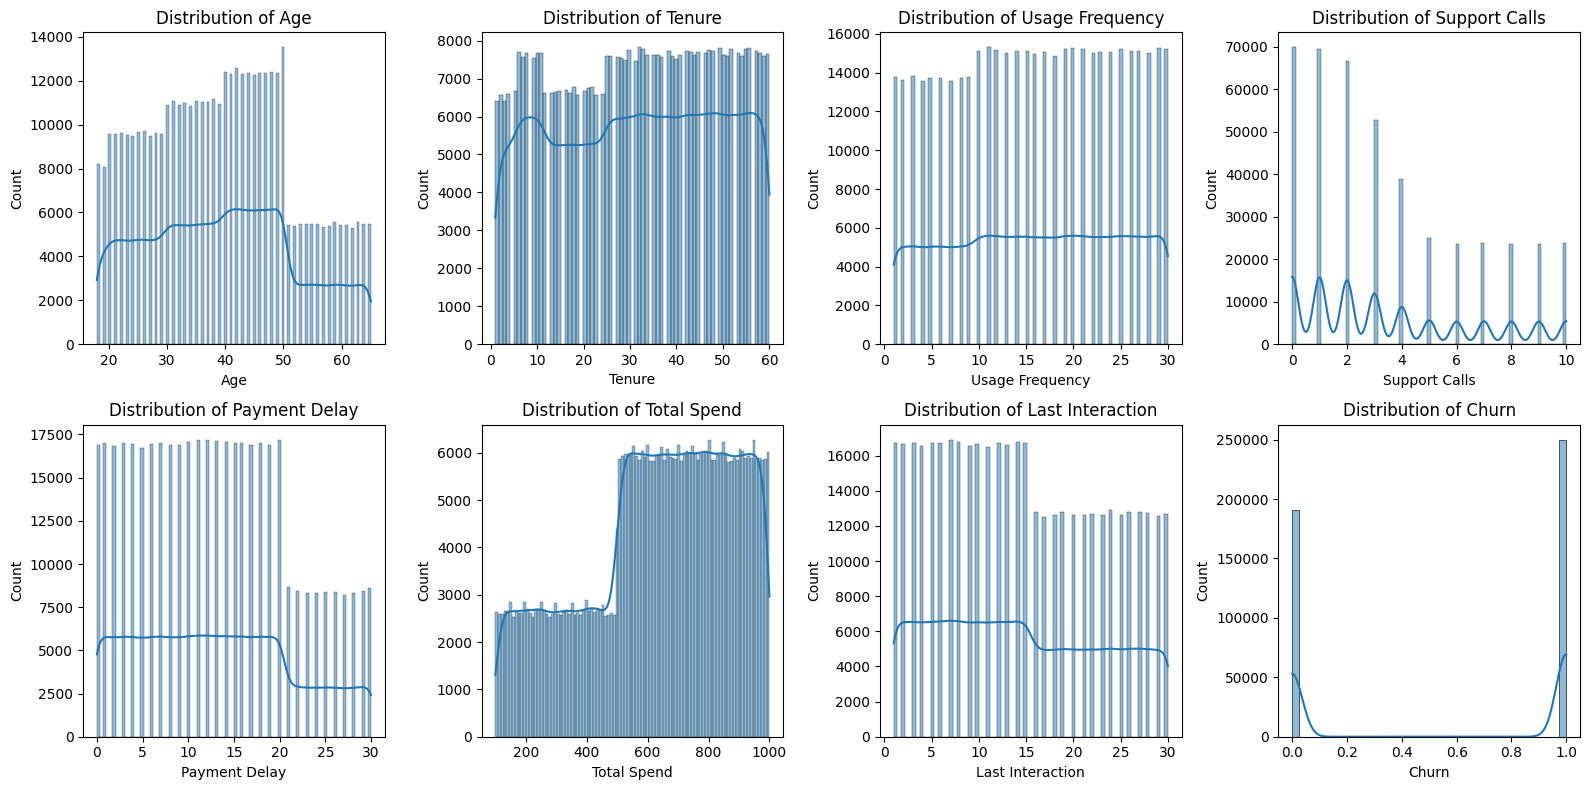

In [16]:
plot_distribution(data, numerical_columns)

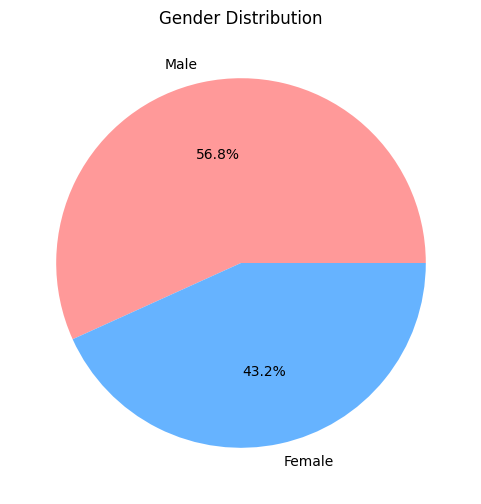

In [17]:
## gender distribution piechart
plt.figure(figsize=(6,6))   
plt.pie(data['Gender'].value_counts(), labels=data['Gender'].value_counts().index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title('Gender Distribution')
plt.show()

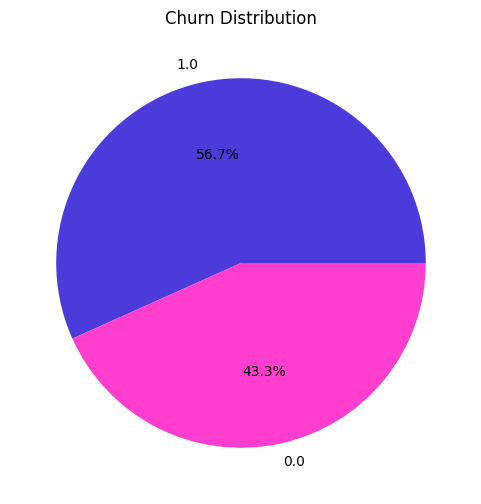

In [18]:
## churn distribution piechart
plt.figure(figsize=(6,6))
plt.pie(data['Churn'].value_counts(), labels=data['Churn'].value_counts().index, autopct='%1.1f%%', colors=["#4b3bdb","#ff3ecf"])
plt.title('Churn Distribution')
plt.show()

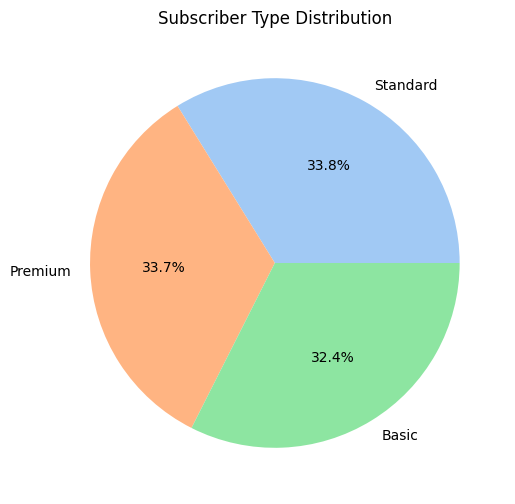

In [19]:
## SubcriberType distribution piechart
plt.figure(figsize=(6,6))
plt.pie(data['Subscription Type'].value_counts(), labels=data['Subscription Type'].value_counts().index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Subscriber Type Distribution')
plt.show()

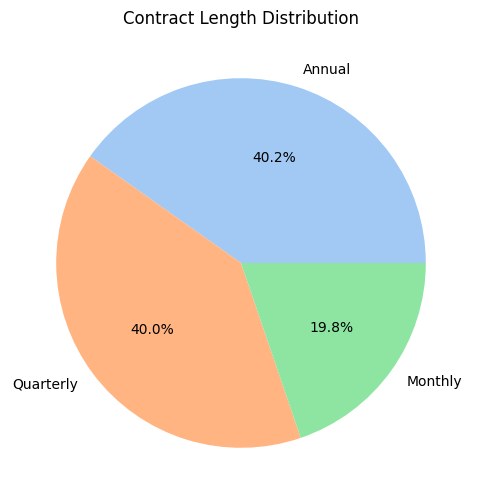

In [20]:
## contract length distribution piechart
plt.figure(figsize=(6,6))
plt.pie(data['Contract Length'].value_counts(), labels=data['Contract Length'].value_counts().index, autopct='%1.1f%%', colors=sns.color_palette('pastel')) 
plt.title('Contract Length Distribution')
plt.show()

## Bivariate Analysis

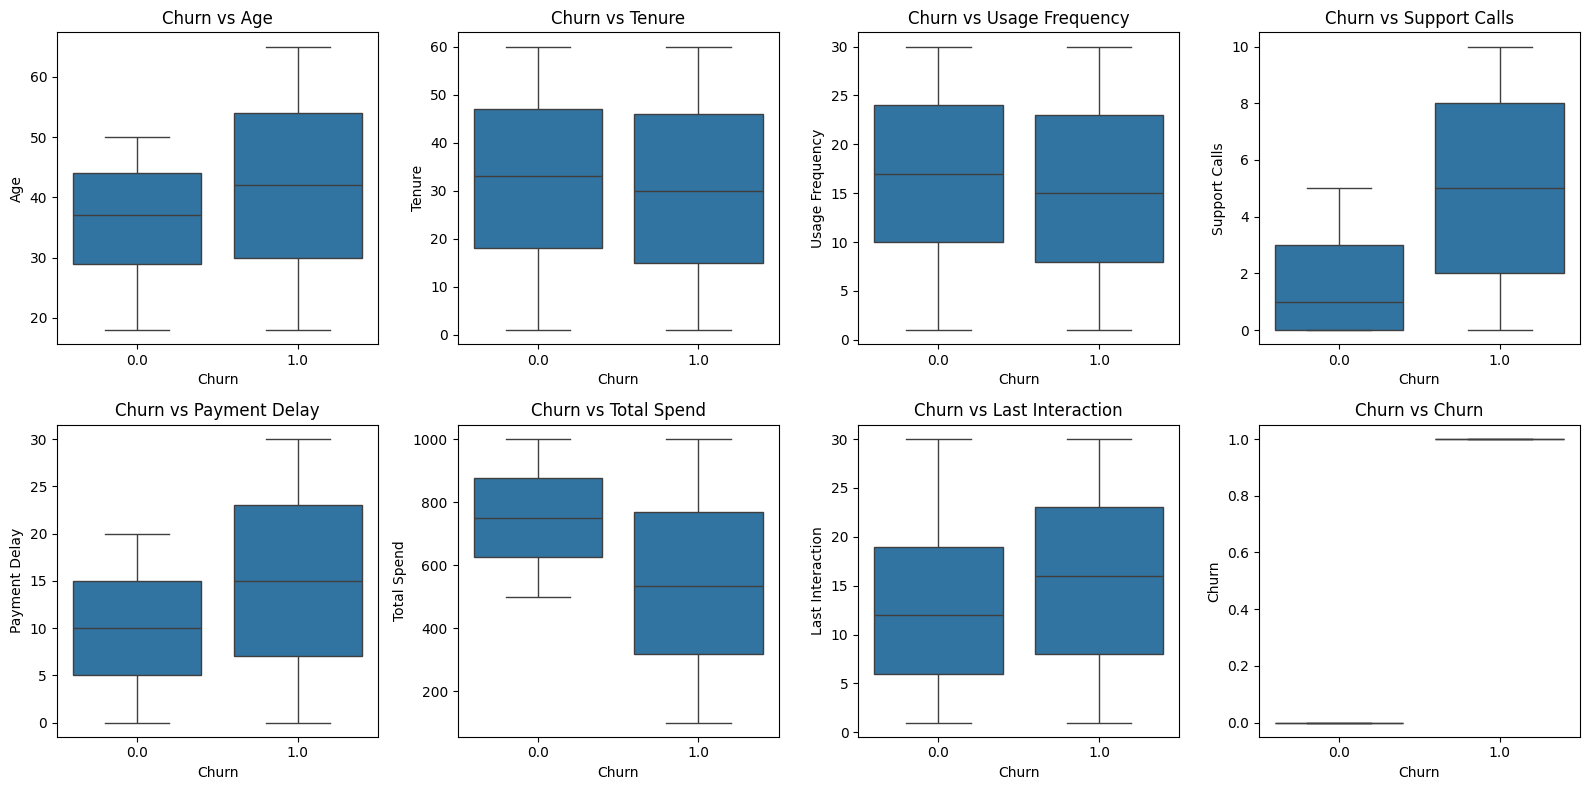

In [21]:
## Churn vs Numerical Features
def plot_churn_numerical(data, numerical_columns):
    n_cols = len(numerical_columns)
    n_rows = (n_cols + 3) // 4  
    plt.figure(figsize=(16, 4*n_rows))
    for i in range(n_cols):
        plt.subplot(n_rows, 4, i+1)  
        sns.boxplot(x='Churn', y=numerical_columns[i], data=data)  
        plt.title(f'Churn vs {numerical_columns[i]}')
    
    plt.tight_layout()
    plt.show()

plot_churn_numerical(data, numerical_columns)

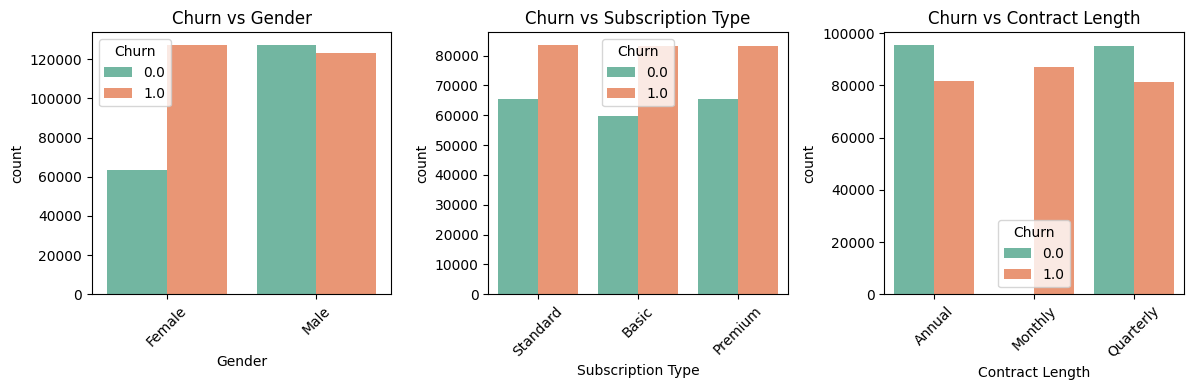

In [22]:
## churn vs categorical features
def plot_churn_categorical(data, categorical_columns):
    n_cols = len(categorical_columns)
    n_rows = (n_cols + 3) // 4  
    plt.figure(figsize=(16, 4*n_rows))
    for i in range(n_cols):
        plt.subplot(n_rows, 4, i+1)  
        sns.countplot(x=categorical_columns[i], hue='Churn', data=data, palette='Set2')  
        plt.title(f'Churn vs {categorical_columns[i]}')
        plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

plot_churn_categorical(data, categorical_columns)

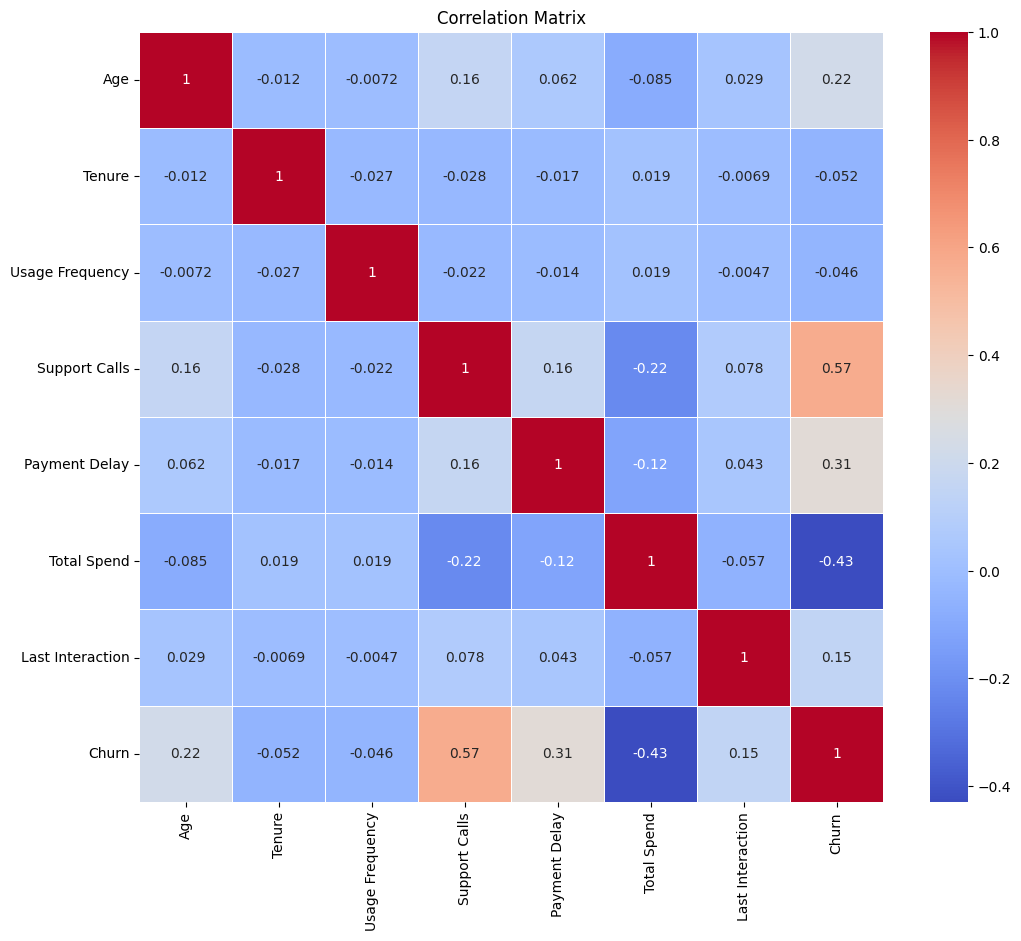

In [23]:
## correlation matrix
df_numerical = data.select_dtypes(include=[np.number])
plt.figure(figsize=(12,10))
sns.heatmap(df_numerical.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()  

#### Strong predictors

- Support Calls

- Total Spend

- Payment Delay

- Last Interaction

## Feature Engineering

In [24]:
## creating new features based on business understanding
data['high_support_calls'] = (data['Support Calls'] > 4).astype(int)
data['payment_delay_flag'] = (data['Payment Delay'] > 0).astype(int)
data['spend_per_month'] = data['Total Spend'] / data['Tenure']

In [25]:
data.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,high_support_calls,payment_delay_flag,spend_per_month
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0,1,1,23.897436
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0,1,1,11.367347
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0,1,1,13.214286
3,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0,1,1,10.421053
4,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0,1,1,19.281250


In [26]:
data.shape

(440832, 14)

## Data Preprocessing

In [27]:
numerical_columns = data.select_dtypes(include=[np.number]).columns.to_list()
categorical_columns = data.select_dtypes(include=['object']).columns.to_list()


In [28]:
numerical_columns.remove('Churn')
print(numerical_columns)

['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction', 'high_support_calls', 'payment_delay_flag', 'spend_per_month']


In [32]:
nominal_categorical = ['Gender', 'Subscription Type']
Ordinal_categorical = ['Contract Length']

In [33]:
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])  
nominal_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first',sparse_output=False,
                handle_unknown='ignore'))
])
ordinal_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(categories=[["Monthly","Quaterly","Yearly"]], handle_unknown='use_encoded_value', unknown_value=-1))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_columns),
    ('nom', nominal_transformer, nominal_categorical),
    ('ord', ordinal_transformer, Ordinal_categorical)
],
remainder='passthrough'
)

In [34]:
## data split
X = data.drop(columns=['Churn'])
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [35]:
X_train.shape

(352665, 13)

In [36]:
X_train.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,high_support_calls,payment_delay_flag,spend_per_month
321745,24.0,Male,58.0,28.0,0.0,4.0,Basic,Annual,665.22,29.0,0,1,11.469310
175119,24.0,Male,26.0,12.0,1.0,26.0,Basic,Quarterly,754.00,12.0,0,1,29.000000
272448,18.0,Male,36.0,8.0,0.0,7.0,Premium,Quarterly,852.86,9.0,0,1,23.690556
66769,36.0,Female,18.0,9.0,2.0,23.0,Premium,Monthly,758.00,3.0,0,1,42.111111
70297,57.0,Female,27.0,26.0,8.0,15.0,Basic,Monthly,688.00,10.0,1,1,25.481481


In [37]:
X_test.shape

(88167, 13)

In [38]:
## preprocessing the data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

## Model Training

In [39]:
def precision_at_k(y_true, y_probs, k=0.1):
    """
    k = fraction (0.1 = top 10%)
    """
    cutoff = int(len(y_probs) * k)
    idx = np.argsort(y_probs)[::-1][:cutoff]
    return y_true.iloc[idx].mean()


In [40]:
models = {
    "LogisticRegression": LogisticRegression(
        max_iter=1000,
        class_weight="balanced",
        n_jobs=-1
    ),

    "RandomForest": RandomForestClassifier(
        n_estimators=300,
        max_depth=None,
        n_jobs=-1,
        class_weight="balanced",
        random_state=42
    ),

    "XGBoost": XGBClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric="logloss",
        n_jobs=-1,
        random_state=42
    ),

    "LightGBM": LGBMClassifier(
        n_estimators=300,
        learning_rate=0.05,
        num_leaves=31,
        class_weight="balanced",
        n_jobs=-1,
        random_state=42
    )
}


In [41]:
results = []

for name, model in models.items():
    print(f"\nTraining {name}...")

    pipe = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("model", model)
    ])

    pipe.fit(X_train, y_train)

    y_pred = pipe.predict(X_test)
    y_proba = pipe.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    p_at_10 = precision_at_k(y_test, y_proba, k=0.10)

    results.append({
        "model": name,
        "accuracy": acc,
        "roc_auc": auc,
        "precision@10%": p_at_10
    })



Training LogisticRegression...

Training RandomForest...

Training XGBoost...

Training LightGBM...
[LightGBM] [Info] Number of positive: 199895, number of negative: 152770
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006006 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 740
[LightGBM] [Info] Number of data points in the train set: 352665, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


In [44]:
results_df = pd.DataFrame(results)

results_df = results_df.sort_values(
    by=["roc_auc", "precision@10%", "accuracy"],
    ascending=False
)

results_df


,model,accuracy,roc_auc,precision@10%
1,RandomForest,0.999682,1.000000,1.0
3,LightGBM,0.999819,1.000000,1.0
2,XGBoost,0.999830,0.999999,1.0
0,LogisticRegression,0.917963,0.966639,1.0
